# Data Preparation and Processing

In [22]:

import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler


In [23]:

train_samples = []
train_labels = []

In [24]:

for i in range(50):
    # 5% of younger individuals with side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # 5% of older individuals with no side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(950):
    # 95% of younger individuals with no side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # 5% of older individuals with no side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)
    

In [25]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

# for i in scaled_train_samples:
#     print(i)

# Sequential Model

### Quesetions: 
1. What is overfitting?
   - Overfitting occurs when a model has learned the specific features of the training set really well. But has a difficult time generalizing on data it hasn't seen before. 
2. How do you know if a model is overfitting?
   - A model can be said to be overfitting when it gives good result on the traning set but less than good results for the validation set.
3. Given a confusion matrix, how do you get the accuracy rate?
   - A confusion matrix visualizes the predictability performance of a model by contrasting the predicted values with the true values. In a confusion matrix, values which has the same predicted value and true value can be seen in the diagonal (top-right to bottom-left). A possible formula to solve for the accuracy rate would be the sum of corrected predictions divided by the total number of data in a dataset. 

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [27]:
physical_devices = tf.config.experimental.list_physical_devices("GPU")
print(f"num GPUs available: {len(physical_devices)}")

num GPUs available: 1


In [28]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation="relu"),
    Dense(units=2, activation="softmax")
])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [31]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
180/180 - 3s - loss: 0.6610 - accuracy: 0.5561 - val_loss: 0.6462 - val_accuracy: 0.6300 - 3s/epoch - 16ms/step
Epoch 2/30
180/180 - 1s - loss: 0.6371 - accuracy: 0.6806 - val_loss: 0.6173 - val_accuracy: 0.7450 - 1s/epoch - 6ms/step
Epoch 3/30
180/180 - 1s - loss: 0.6110 - accuracy: 0.7494 - val_loss: 0.5881 - val_accuracy: 0.8000 - 981ms/epoch - 5ms/step
Epoch 4/30
180/180 - 1s - loss: 0.5831 - accuracy: 0.7772 - val_loss: 0.5536 - val_accuracy: 0.8600 - 937ms/epoch - 5ms/step
Epoch 5/30
180/180 - 1s - loss: 0.5502 - accuracy: 0.8261 - val_loss: 0.5162 - val_accuracy: 0.8850 - 811ms/epoch - 5ms/step
Epoch 6/30
180/180 - 1s - loss: 0.5193 - accuracy: 0.8522 - val_loss: 0.4819 - val_accuracy: 0.8850 - 731ms/epoch - 4ms/step
Epoch 7/30
180/180 - 1s - loss: 0.4904 - accuracy: 0.8617 - val_loss: 0.4481 - val_accuracy: 0.9250 - 835ms/epoch - 5ms/step
Epoch 8/30
180/180 - 1s - loss: 0.4625 - accuracy: 0.8750 - val_loss: 0.4152 - val_accuracy: 0.9250 - 758ms/epoch - 4ms/step
Epoch

## Predict

In [32]:
predictions = model.predict(x=scaled_train_samples, batch_size=10, verbose=0)

In [33]:
# for i in predictions:
#     print(i)

In [34]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [35]:
for i in rounded_predictions:
    print(i)

0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


## Confusion Matrix

In [36]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [37]:
cm = confusion_matrix(y_true=train_labels, y_pred=rounded_predictions)

In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Confusion matrix",
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.xticks(tick_marks, classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalize confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")

Confusion matrix, without normalization
[[931  69]
 [ 50 950]]


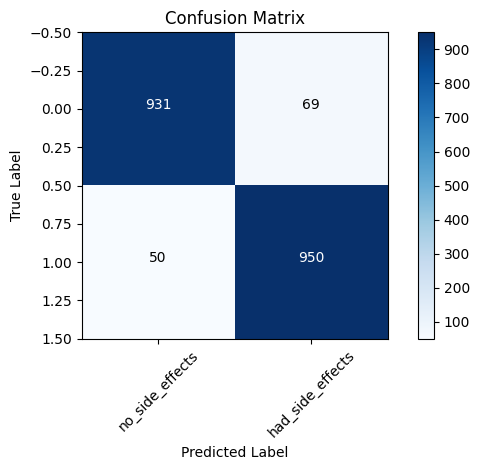

In [39]:
cm_plot_labels = ["no_side_effects", "had_side_effects"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

In [40]:
import os.path

if os.path.isfile("models/medical_trial_model.h5") is False:
    model.save("models/medical_trial_model.h5")